In [1]:
import pathlib
import ggcmpy
from ggcmpy.timeseries import read_ggcm_solarwind_directory, store_to_pyspedas
import xarray as xr
import pyspedas
from pyspedas import options, tplot, get_data, store_data, tplot_names
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
RUN_NAME = "260208_2349"
RUN_DIR = pathlib.Path("/mnt/lustre/germaschewski/cu1010/runs") / RUN_NAME
SW_DIR = RUN_DIR / "inp"
DATA_DIR = RUN_DIR / "target"

In [3]:
trange = ["2025-11-11/15:00:00", "2025-11-13/19:00:00"]

In [4]:
pyspedas.omni.data(trange=trange, datatype="1min", time_clip=True)

12-Feb-26 02:03:48: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2025/
12-Feb-26 02:03:49: File is current: omni_data/hro_1min/2025/omni_hro_1min_20251101_v01.cdf
12-Feb-26 02:03:51: Floating point data values for variable PC_N_INDEX are all fillval (9.999900e+02)


['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H',
 'PC_N_INDEX']

In [5]:
plt.style.use("seaborn-v0_8-whitegrid")

In [6]:
omni = read_ggcm_solarwind_directory(SW_DIR, glob="omni.*")
store_to_pyspedas(omni)
# ?read_ggcm_solarwind_directory

In [7]:
files = sorted(DATA_DIR.glob(f"{RUN_NAME}.iof.*00"))
iof = xr.open_mfdataset(files)

In [8]:
ggcm_al = iof.ggcm.al_index()
ggcmpy.timeseries.store_to_pyspedas(ggcm_al["ggcm.al"])

In [9]:
pyspedas.store_data("al", data=["AL_INDEX", "ggcm.al"])

True

In [10]:
cpcp = iof.ggcm.cpcp() * 1e-3
cpcp.attrs["long_name"] = "CPCP"
cpcp.attrs["units"] = "kV"
store_to_pyspedas(cpcp)

In [11]:
options("omni.bzgse", "ytitle", "Input Bz (GSE)")
options("omni.bzgse", "legend_names", "")
options("al", "color", ["black", "red"])
options("al", "ytitle", "AL Index")
options("al", "legend_names", ["OMNI", "OpenGGCM"])
options("al", "legend_location", "lower right")
options("ggcm.al", "color", "red")
# options("ggcm.al", "yrange", [-1200, 0])
options("ggcm.al", "ytitle", "AL Index")
options("ggcm.al", "legend_names", "OpenGGCM")
options("ggcm.al", "legend_location", "lower right")
# options("cpcp", "yrange", [0, 700])
options("cpcp", "legend_names", "OpenGGCM")
options("cpcp", "legend_location", "upper right")

12-Feb-26 02:08:10: /mnt/lustre/germaschewski/cu1010/miniconda3/envs/0312/lib/python3.12/site-packages/pyspedas/tplot_tools/MPLPlotter/lineplot.py:235: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = this_axis.legend(loc=legend_location, fontsize=legend_size, shadow=legend_shadow, title=legend_title,



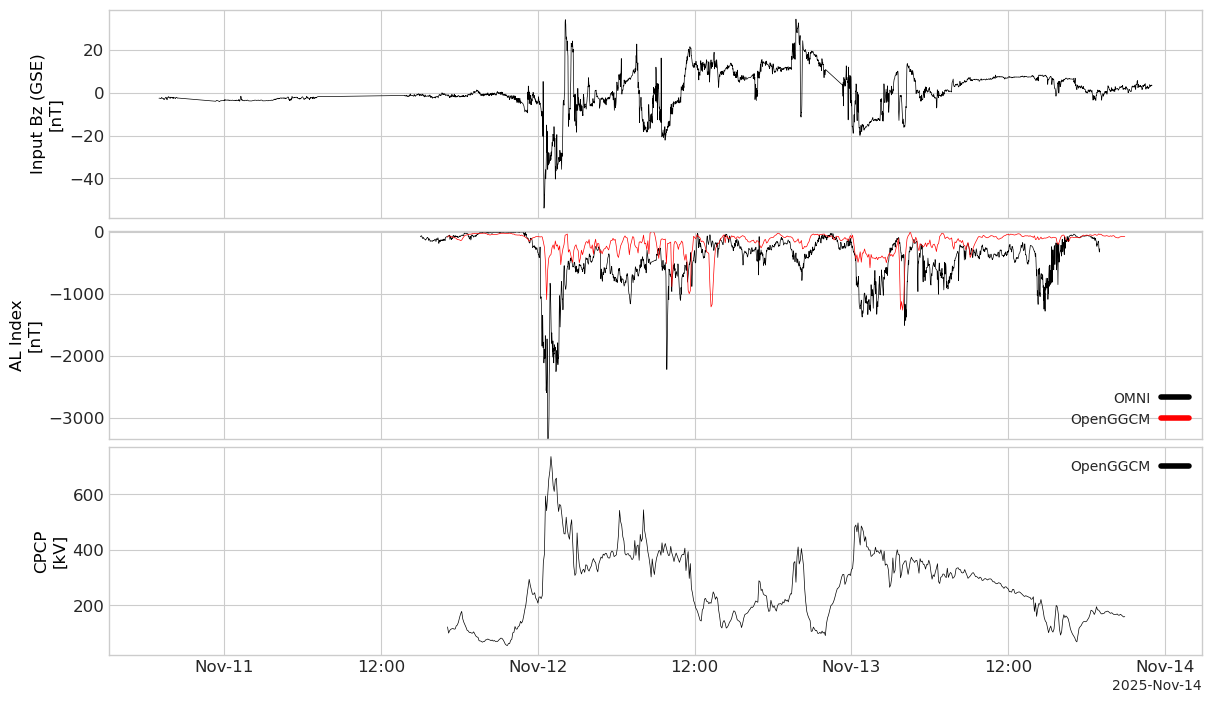

In [12]:
tplot(["omni.bzgse", "al", "cpcp"])

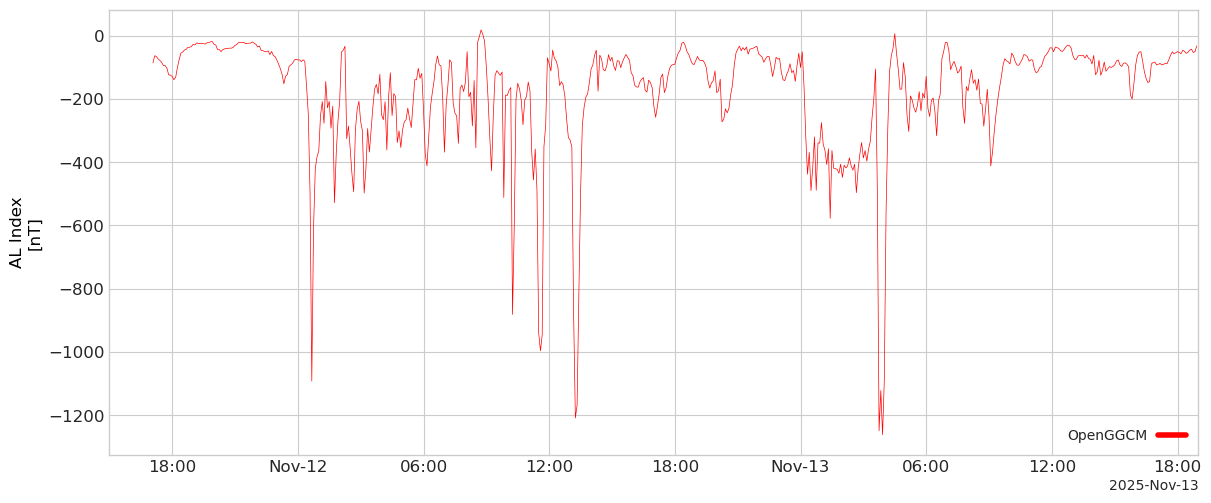

In [13]:
tplot(["ggcm.al"], trange=trange)

In [14]:
files = sorted(DATA_DIR.glob(f"{RUN_NAME}.py_0.*00"))
py_0 = xr.open_mfdataset(files)

In [15]:
time_max = iof.time.shape[0]

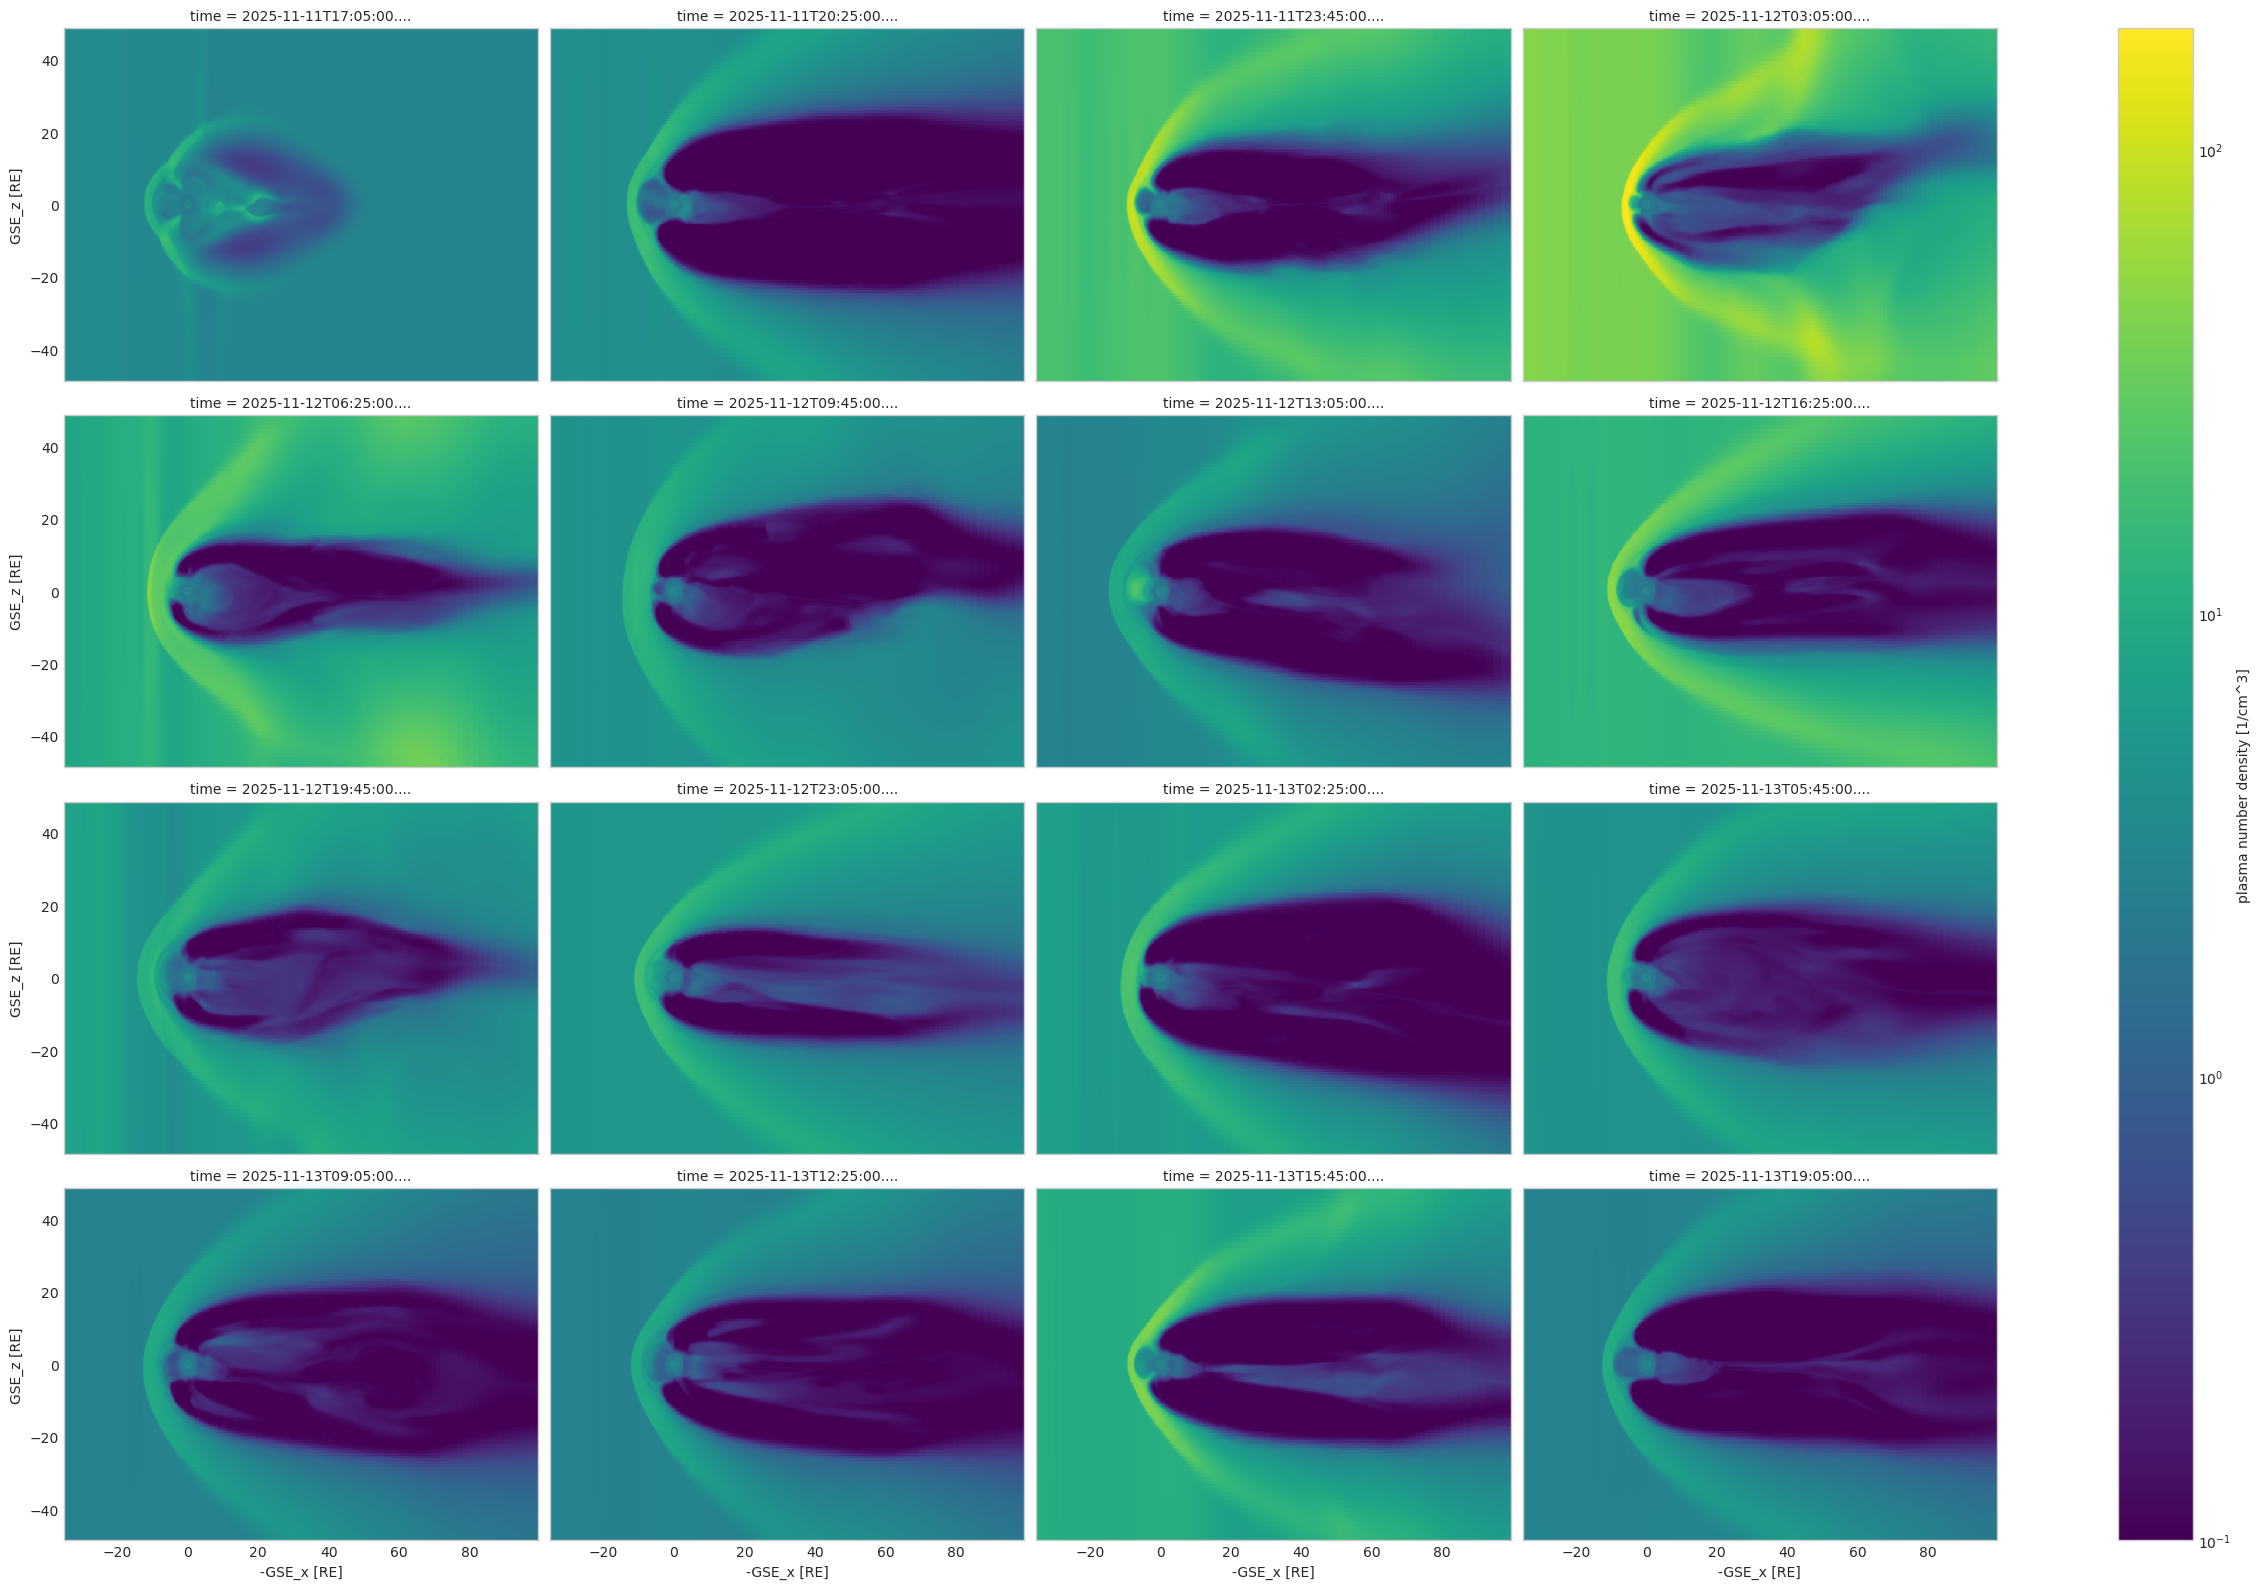

In [16]:
py_0.rr.sel(x=slice(-50.0, 100.0), z=slice(-50.0, 50.0)).isel(
    time=slice(0, time_max, 40)
).T.plot(col="time", col_wrap=4, aspect=1.5, size=4, norm=colors.LogNorm());

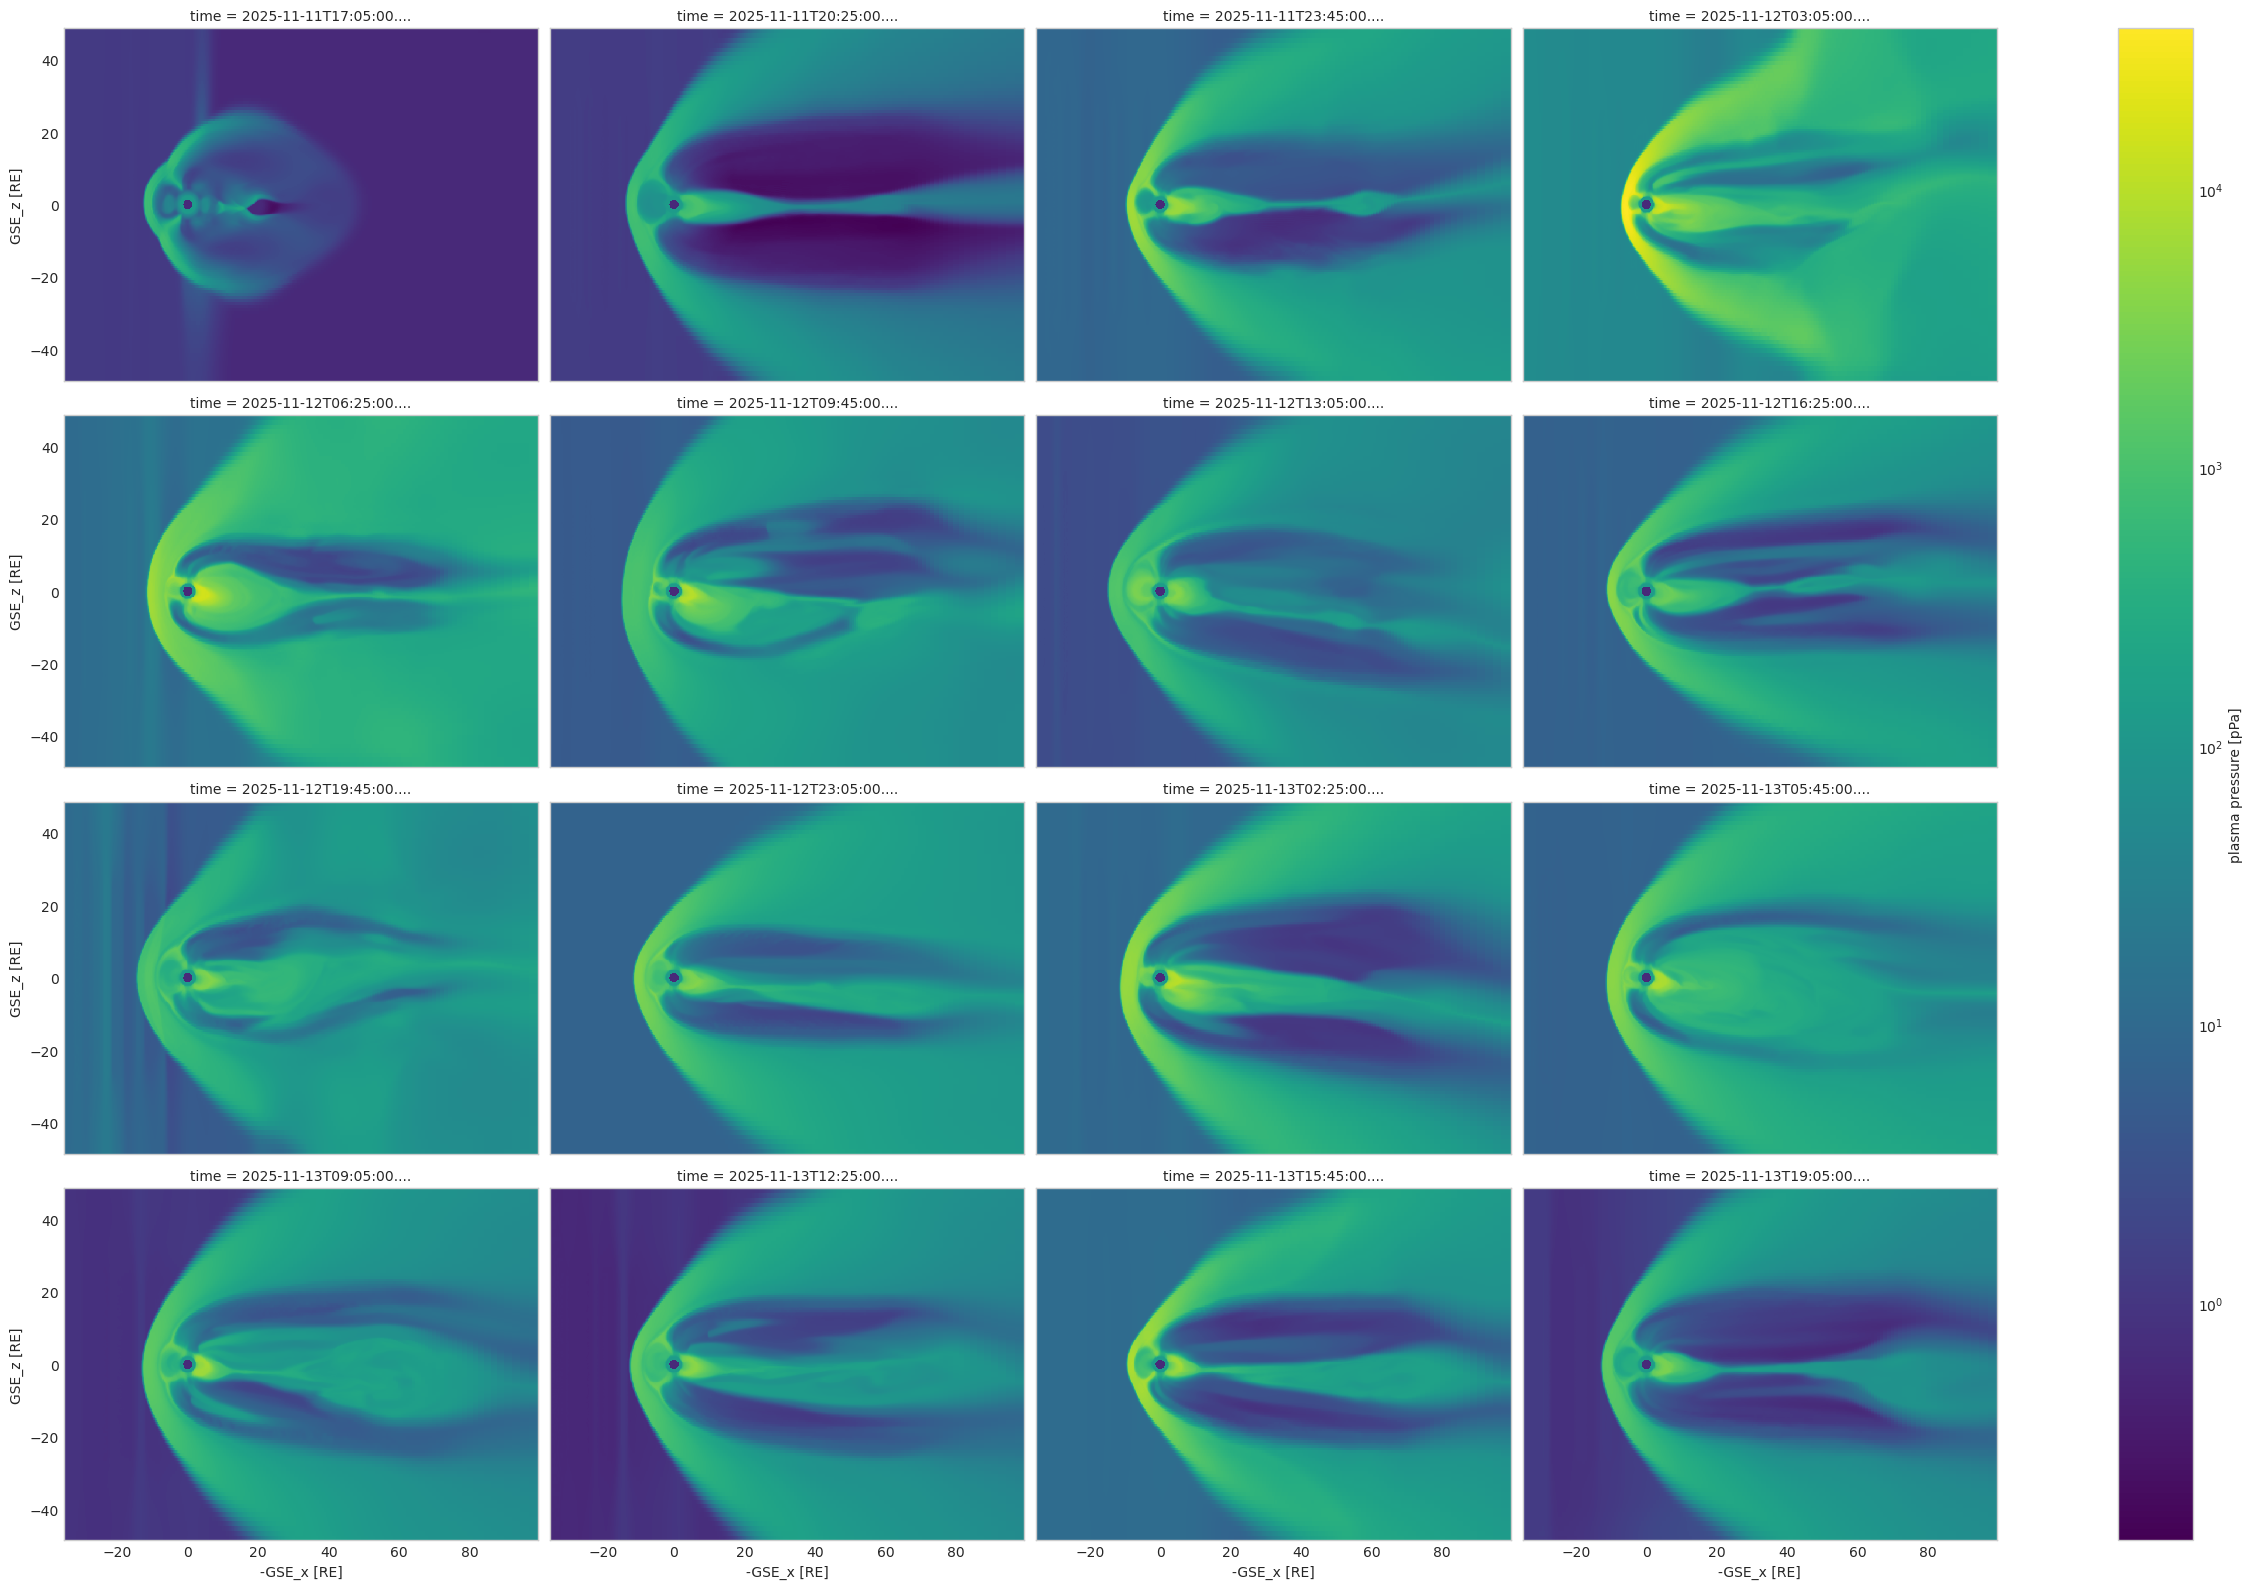

In [17]:
py_0.pp.sel(x=slice(-50.0, 100.0), z=slice(-50.0, 50.0)).isel(
    time=slice(0, None, 40)
).T.plot(col="time", col_wrap=4, aspect=1.5, size=4, norm=colors.LogNorm());

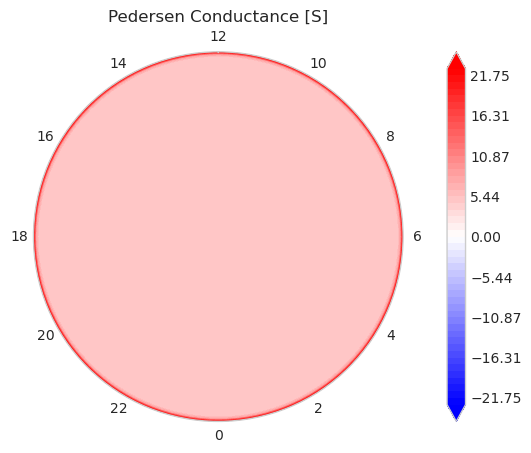

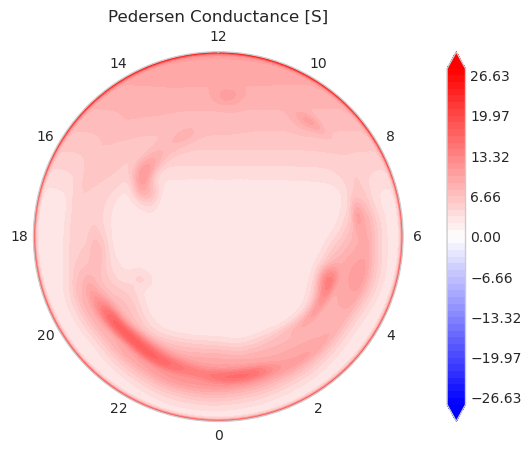

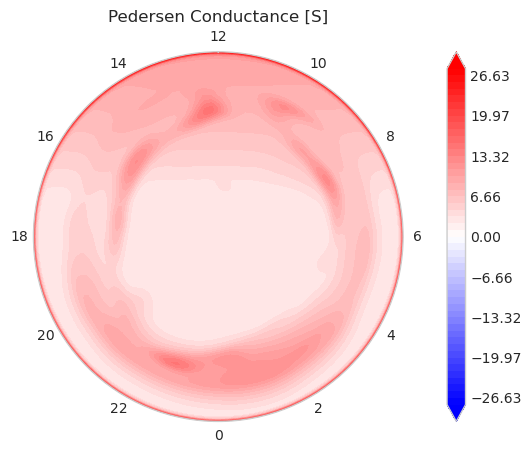

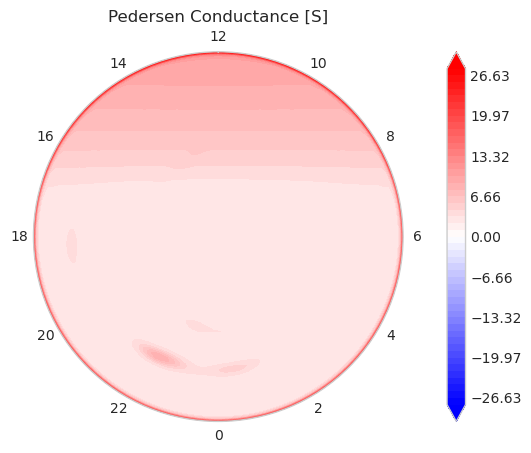

In [18]:
time_max = iof.time.shape[0]
for i in range(1, time_max, 200):
    iof.isel(time=i).sigp.ggcm.plot()

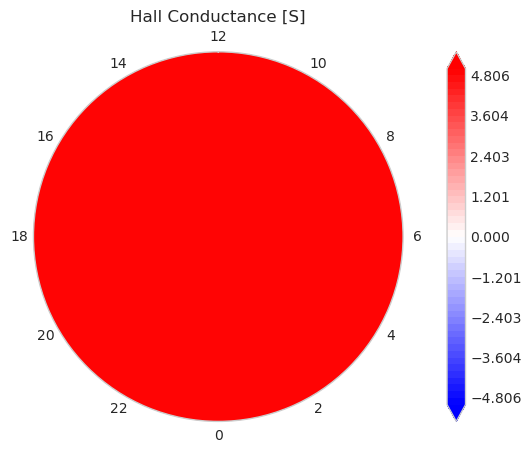

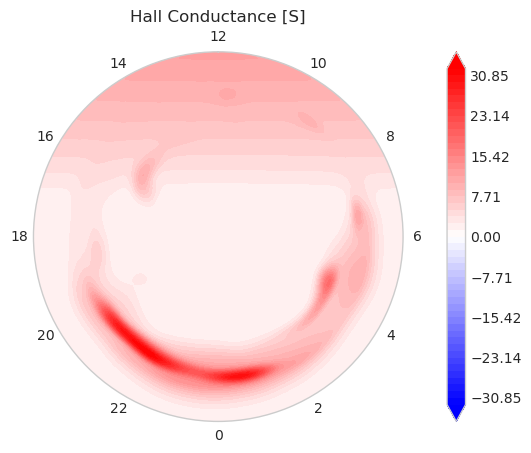

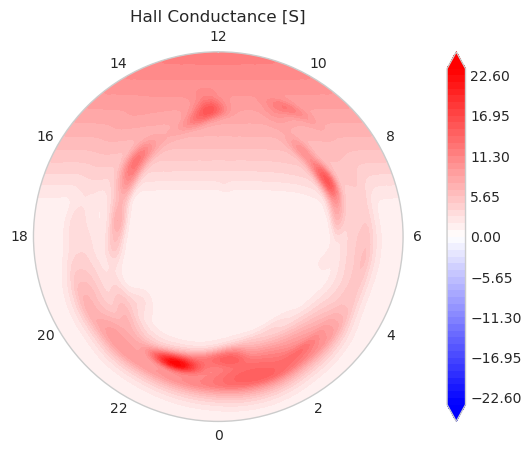

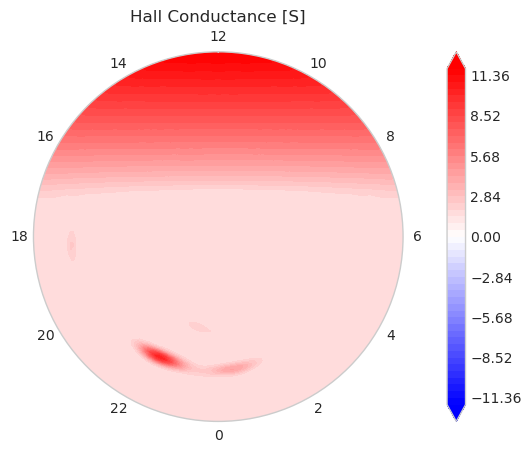

In [19]:
time_max 
for i in range(1, time_max, 200):
    iof.isel(time=i).sigh.ggcm.plot()

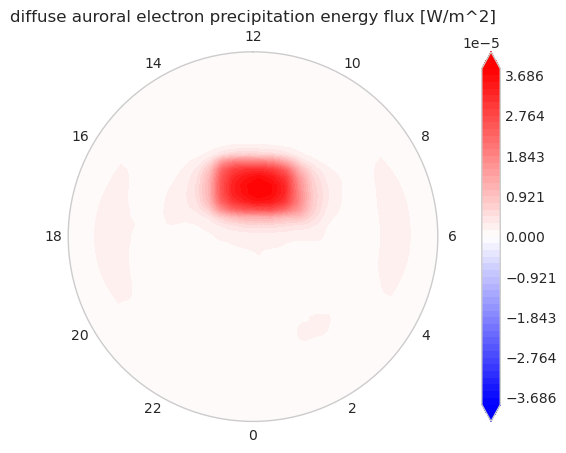

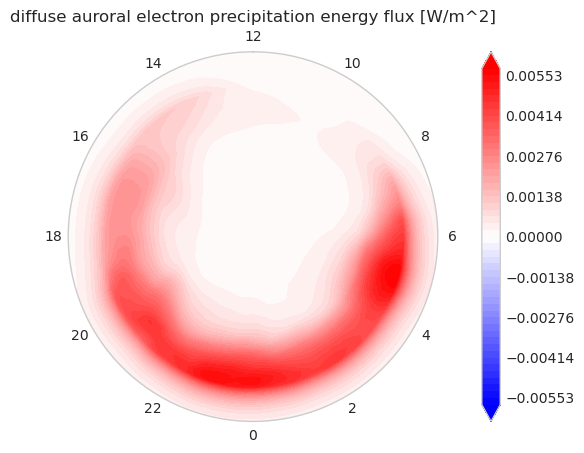

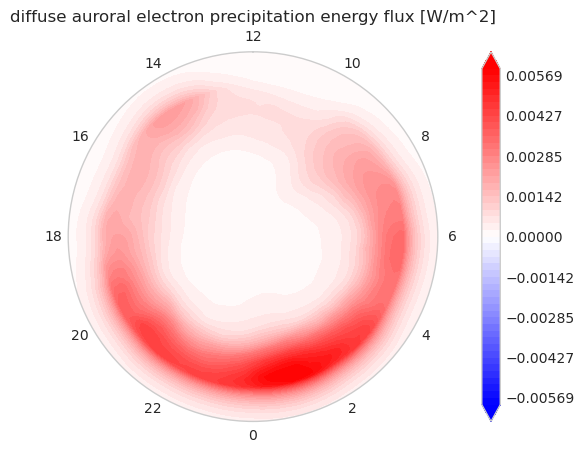

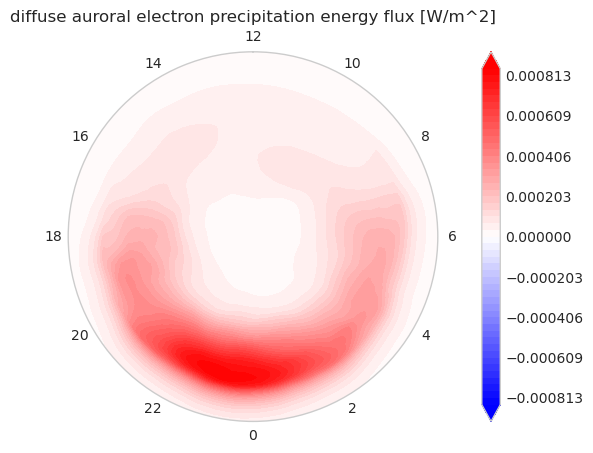

In [20]:
for i in range(1, time_max, 200):
    iof.isel(time=i).prec_e_fe_1.ggcm.plot()

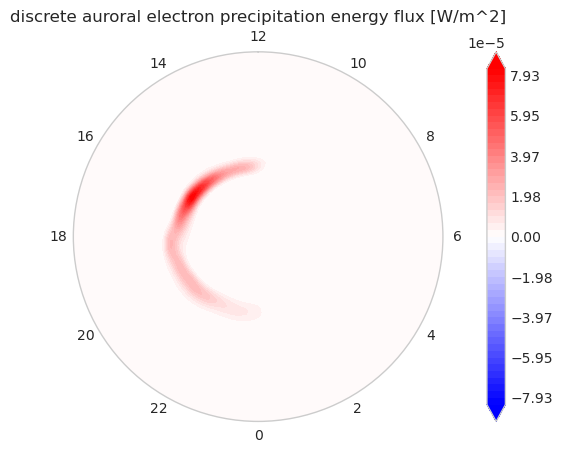

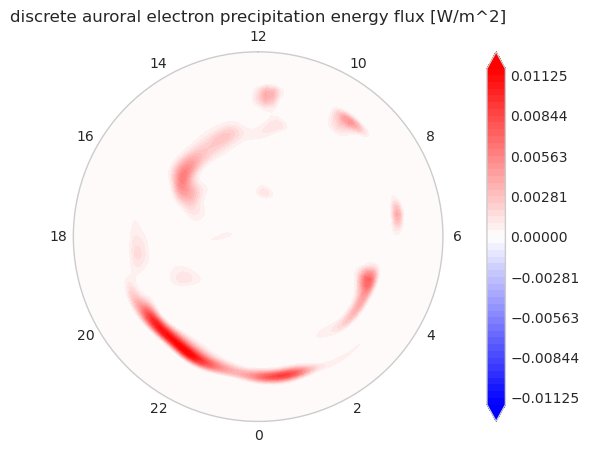

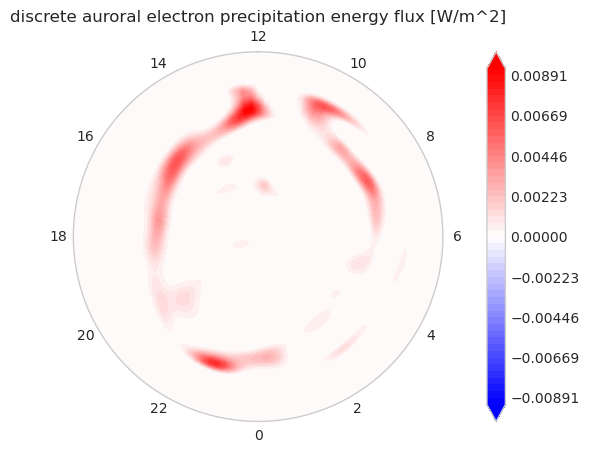

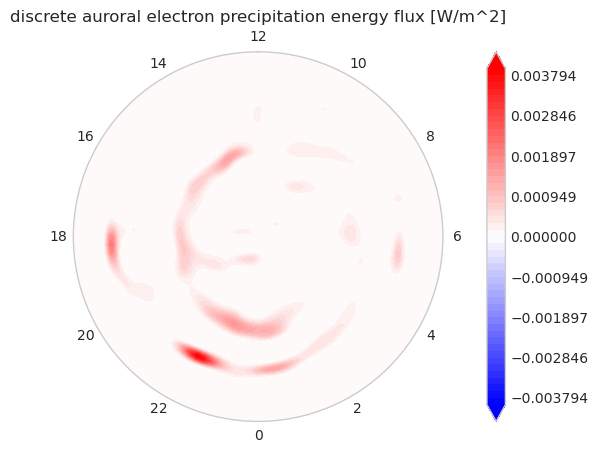

In [21]:
for i in range(1, time_max, 200):
    iof.isel(time=i).prec_e_fe_2.ggcm.plot()